[Original author](https://designwith.ml/assets/docs/Meetup_clustering_sample)  
  
Clustering meetup.com data! Using the location and group information to cluster the members into 6 clusters - but it is up to you to figure out what they mean!  

Data was on Kaggle.

In [24]:
#these are all of the libraries i'll be using - and I load the groups.csv data
import pandas as pd
import numpy as np
import random
import sklearn
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [25]:
import pandas as pd

df = pd.read_csv(r"C:\Users\danpo\OneDrive\Master\Anul 2\Curs ML\ubb-sociology-ml\data\groups.csv")

# Data Step
This step we're going to look at our dataframes and become familiar with what's in them.

In [26]:
#this is what the groups.csv looks like as a dataframe - it is about the groups
df.head()

group_id  category_id          category.name     category.shortname  \
0      6388           14       health/wellbeing       health-wellbeing   
1      6510            4  community/environment  community-environment   
2      8458           26           pets/animals           pets-animals   
3      8940           29         sci-fi/fantasy         sci-fi-fantasy   
4     10104           26           pets/animals           pets-animals   

   city_id      city country              created  \
0    10001  New York      US  2002-11-21 16:50:46   
1    10001  New York      US  2003-05-20 14:48:54   
2    10001  New York      US  2004-03-27 09:55:41   
3    10001  New York      US  2002-11-16 04:49:16   
4    10001  New York      US  2003-10-22 21:39:49   

                                         description  \
0  Those who practice or hold a strong interest i...   
1  The New York Alternative Energy Meetupis for t...   
2                                          not_found   
3  Welcome to the The New York City Anime Meetup ...   
4  We welcome those who support pits, even if you...   

              group_photo.base_url  ...  \
0  https://secure.meetupstatic.com  ...   
1  https://secure.meetupstatic.com  ...   
2  https://secure.meetupstatic.com  ...   
3  https://secure.meetupstatic.com  ...   
4  https://secure.meetupstatic.com  ...   

                          organizer.photo.photo_link  \
0  https://secure.meetupstatic.com/photos/member/...   
1  https://secure.meetupstatic.com/photos/member/...   
2  https://secure.meetupstatic.com/photos/member/...   
3  https://secure.meetupstatic.com/photos/member/...   
4  https://secure.meetupstatic.com/photos/member/...   

                          organizer.photo.thumb_link organizer.photo.type  \
0  https://secure.meetupstatic.com/photos/member/...               member   
1  https://secure.meetupstatic.com/photos/member/...               member   
2  https://secure.meetupstatic.com/photos/member/...               member   
3  https://secure.meetupstatic.com/photos/member/...               member   
4  https://secure.meetupstatic.com/photos/member/...               member   

  rating state    timezone                    urlname utc_offset  \
0   4.39    NY  US/Eastern     alternative-health-nyc     -14400   
1   4.31    NY  US/Eastern  alternative-energy-meetup     -14400   
2   4.84    NY  US/Eastern                    Animals     -14400   
3   4.46    NY  US/Eastern                  NYC-Anime     -14400   
4   4.09    NY  US/Eastern                NYC-Pitbull     -14400   

       visibility                            who  
0          public            Explorers of Health  
1          public        Clean Energy Supporters  
2          public                  Animal Voices  
3          public                     Anime Fans  
4  public_limited  NYC Pits & People, Dog Lovers  

[5 rows x 36 columns]

In [27]:
#this is the df about the members
df2 = pd.read_csv(r"C:\Users\danpo\OneDrive\Master\Anul 2\Curs ML\ubb-sociology-ml\data\members.csv", encoding = "ISO-8859-1" , nrows=1600133) #  This encoding is commonly used for Western European languages and is a single-byte encoding that can represent a wide range of characters, including characters with accents and diacritics.

In [28]:
df2.shape

(1600133, 14)

In [29]:
df2.head()

member_id                                                bio      city  \
0          3                                          not_found  New York   
1          3                                          not_found  New York   
2          3  Hi, I'm Matt. I'm an entrepreneur who has star...  New York   
3          3  Hi, I'm Matt. I'm an entrepreneur who has star...  New York   
4          3  Hi, I'm Matt. I'm an entrepreneur who has star...  New York   

  country      hometown               joined    lat  \
0      us  New York, NY  2007-05-01 22:04:37  40.72   
1      us  New York, NY  2011-01-23 14:13:17  40.72   
2      us  New York, NY  2010-12-30 18:47:34  40.72   
3      us  New York, NY  2011-01-03 14:45:21  40.72   
4      us  New York, NY  2010-12-30 18:34:50  40.72   

                              link   lon  member_name state member_status  \
0  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
1  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
2  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
3  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   
4  http://www.meetup.com/members/3 -74.0  Matt Meeker    NY        active   

               visited  group_id  
0  2009-09-18 18:32:23    490552  
1  2011-03-20 01:02:11   1474611  
2  2011-01-18 20:37:23   1490492  
3  2011-07-23 03:42:28   1515830  
4  2011-06-13 18:33:23   1574965

## Data Cleaning Phase
In this phase, we'll sample a % of the data, and then use "one hot" encoding to turn string features into numbers for our mathematical models.

In [30]:
# I am sampling to 5,000 random samples from the dataframe since it is just SOOO big! This will help my code run faster
df2_sample = df2.sample(n=5000)

In [31]:
#let's explore the df by member id and the first record number of each - what are the features we want to use?
# group a DataFrame (df2_sample) by the 'member_id' column and then select the first row within each group.
# This operation is often used to get the first entry or a representative entry for each unique member ID.
df2_sample.groupby(['member_id']).first()

bio           city  \
member_id                                                                     
10418                                              not_found       New York   
40251                                              not_found       New York   
59249                                              not_found       New York   
67439                                              not_found  San Francisco   
75935      I'm a content strategist, an interactive proje...        Chicago   
...                                                      ...            ...   
48343352                                           not_found       New York   
48362792                                           not_found        Chicago   
48419302                                           not_found  San Francisco   
48427992   I am kind of new to this underwater exploratio...  San Francisco   
48450992                                           not_found        Chicago   

          country       hometown               joined    lat  \
member_id                                                      
10418          us      not_found  2002-06-26 11:03:51  40.75   
40251          us      not_found  2016-10-24 20:47:52  40.79   
59249          us      not_found  2005-03-27 07:30:07  40.75   
67439          us  San Francisco  2011-11-28 21:33:50  37.77   
75935          us      not_found  2013-08-27 17:56:54  41.89   
...           ...            ...                  ...    ...   
48343352       us      not_found  2015-06-17 20:59:11  40.75   
48362792       us      Woodridge  2015-02-28 09:17:08  41.85   
48419302       us     Pittsburgh  2016-05-17 14:33:39  37.78   
48427992       us  San Francisco  2014-09-17 17:27:22  37.80   
48450992       us      not_found  2015-09-05 17:51:40  41.99   

                                             link     lon  \
member_id                                                   
10418         http://www.meetup.com/members/10418  -73.99   
40251         http://www.meetup.com/members/40251  -73.98   
59249         http://www.meetup.com/members/59249  -73.99   
67439         http://www.meetup.com/members/67439 -122.44   
75935         http://www.meetup.com/members/75935  -87.63   
...                                           ...     ...   
48343352   http://www.meetup.com/members/48343352  -73.99   
48362792   http://www.meetup.com/members/48362792  -87.67   
48419302   http://www.meetup.com/members/48419302 -122.42   
48427992   http://www.meetup.com/members/48427992 -122.46   
48450992   http://www.meetup.com/members/48450992  -87.66   

                   member_name state member_status              visited  \
member_id                                                                 
10418                  kudude1    NY        active  2004-08-05 02:48:10   
40251            Noreen Whysel    NY        active  2016-10-24 20:47:52   
59249                    kiana    NY        active  2005-07-14 02:18:28   
67439             deeje cooley    CA        active  2014-02-15 21:55:26   
75935          Christine Grant    IL        active  2017-01-25 15:59:47   
...                        ...   ...           ...                  ...   
48343352         Michael  Duda    NY        active  2016-11-05 18:37:15   
48362792   Christopher Simokat    IL        active  2016-06-27 08:20:40   
48419302                 Sujay    CA        active  2017-04-22 07:22:23   
48427992       Naghmeh Shafiei    CA        active  2015-09-22 02:10:44   
48450992        Robert Hoffman    IL        active  2015-09-05 17:51:40   

           group_id  
member_id            
10418        147811  
40251       6034152  
59249         54628  
67439       1723236  
75935       2749392  
...             ...  
48343352    1755448  
48362792   18039662  
48419302   18383094  
48427992    1777363  
48450992    1486302  

[4724 rows x 13 columns]

df2_sample['group_id']: This extracts the 'group_id' column from the DataFrame df2_sample.  
pd.get_dummies(...): This function converts categorical variable(s) into dummy/indicator variables. In this case, it's applied to the 'group_id' column.  
prefix='group_id': This parameter adds a prefix to the newly created dummy variable columns to indicate their association with the original 'group_id'.  
  
  The resulting df2_sample_dummies DataFrame will contain new binary columns (0 or 1) for each unique value in the 'group_id' column. Each row will have a 1 in the column corresponding to its 'group_id' and 0s in the other columns.

In [32]:
#One feature I want to use is the GROUP ID - one thing that we can do is "get dummies" or "one-hot encoding" to
#turn string variables into numbers! look at it below
df2_sample_dummies = pd.get_dummies(df2_sample['group_id'], prefix = 'group_id')

In [33]:
#this is what it looks like to have "dummies" or one-hot encoded variables!
df2_sample_dummies.head()

group_id_6388  group_id_6510  group_id_8458  group_id_8940  \
166536           False          False          False          False   
387221           False          False          False          False   
1350022          False          False          False          False   
370689           False          False          False          False   
1502500          False          False          False          False   

         group_id_12542  group_id_12907  group_id_14573  group_id_15324  \
166536            False           False           False           False   
387221            False           False           False           False   
1350022           False           False           False           False   
370689            False           False           False           False   
1502500           False           False           False           False   

         group_id_17921  group_id_18843  ...  group_id_26127930  \
166536            False           False  ...              False   
387221            False           False  ...              False   
1350022           False           False  ...              False   
370689            False           False  ...              False   
1502500           False           False  ...              False   

         group_id_26180263  group_id_26213972  group_id_26256827  \
166536               False              False              False   
387221               False              False              False   
1350022              False              False              False   
370689               False              False              False   
1502500              False              False              False   

         group_id_26285226  group_id_26290255  group_id_26305466  \
166536               False              False              False   
387221               False              False              False   
1350022              False              False              False   
370689               False              False              False   
1502500              False              False              False   

         group_id_26315598  group_id_26330590  group_id_26355546  
166536               False              False              False  
387221               False              False              False  
1350022              False              False              False  
370689               False              False              False  
1502500              False              False              False  

[5 rows x 2765 columns]

In [34]:
#Let's combine it back to our original dataframe
df2_sample_dummies_concat = pd.concat([df2_sample, df2_sample_dummies], axis=1)

In [35]:
df2_sample_dummies_concat.head()

member_id                                                bio  \
166536     3543698  stephen orban, R&D web shared services, Bloomb...   
387221     7325430                                          not_found   
1350022   29261262                                          not_found   
370689     7059477                                          not_found   
1502500   40755762  I'm Tara, SAHM to Jackson (Feb '11) and Aidan ...   

                  city country        hometown               joined    lat  \
166536        New York      us       not_found  2012-02-09 22:16:04  40.74   
387221   San Francisco      us     los angeles  2008-06-19 19:32:41  37.78   
1350022       New York      us       not_found  2017-04-14 01:53:34  40.76   
370689        New York      us       not_found  2015-11-23 14:50:33  40.73   
1502500        Chicago      us  Brownstown, MI  2014-10-04 12:08:50  41.92   

                                           link     lon      member_name  ...  \
166536    http://www.meetup.com/members/3543698  -74.00    Stephen Orban  ...   
387221    http://www.meetup.com/members/7325430 -122.42          heather  ...   
1350022  http://www.meetup.com/members/29261262  -73.99     Polina Hanin  ...   
370689    http://www.meetup.com/members/7059477  -74.01  Allison Milgrom  ...   
1502500  http://www.meetup.com/members/40755762  -87.65       Tara Steel  ...   

        group_id_26127930 group_id_26180263 group_id_26213972  \
166536              False             False             False   
387221              False             False             False   
1350022             False             False             False   
370689              False             False             False   
1502500             False             False             False   

         group_id_26256827  group_id_26285226  group_id_26290255  \
166536               False              False              False   
387221               False              False              False   
1350022              False              False              False   
370689               False              False              False   
1502500              False              False              False   

         group_id_26305466  group_id_26315598  group_id_26330590  \
166536               False              False              False   
387221               False              False              False   
1350022              False              False              False   
370689               False              False              False   
1502500              False              False              False   

         group_id_26355546  
166536               False  
387221               False  
1350022              False  
370689               False  
1502500              False  

[5 rows x 2779 columns]

In [36]:
#let's repeat the same process for the "cities" feature
df2_sample_dummies_cities = pd.get_dummies(df2_sample_dummies_concat['city'], prefix = 'cities_')
df2_sample_dummies_concat_cities2 = pd.concat([df2_sample_dummies_concat, df2_sample_dummies_cities], axis=1)

In [37]:
df2_sample_dummies_concat_cities2.head()

member_id                                                bio  \
166536     3543698  stephen orban, R&D web shared services, Bloomb...   
387221     7325430                                          not_found   
1350022   29261262                                          not_found   
370689     7059477                                          not_found   
1502500   40755762  I'm Tara, SAHM to Jackson (Feb '11) and Aidan ...   

                  city country        hometown               joined    lat  \
166536        New York      us       not_found  2012-02-09 22:16:04  40.74   
387221   San Francisco      us     los angeles  2008-06-19 19:32:41  37.78   
1350022       New York      us       not_found  2017-04-14 01:53:34  40.76   
370689        New York      us       not_found  2015-11-23 14:50:33  40.73   
1502500        Chicago      us  Brownstown, MI  2014-10-04 12:08:50  41.92   

                                           link     lon      member_name  ...  \
166536    http://www.meetup.com/members/3543698  -74.00    Stephen Orban  ...   
387221    http://www.meetup.com/members/7325430 -122.42          heather  ...   
1350022  http://www.meetup.com/members/29261262  -73.99     Polina Hanin  ...   
370689    http://www.meetup.com/members/7059477  -74.01  Allison Milgrom  ...   
1502500  http://www.meetup.com/members/40755762  -87.65       Tara Steel  ...   

        group_id_26290255 group_id_26305466 group_id_26315598  \
166536              False             False             False   
387221              False             False             False   
1350022             False             False             False   
370689              False             False             False   
1502500             False             False             False   

         group_id_26330590  group_id_26355546  cities__Chicago  \
166536               False              False            False   
387221               False              False            False   
1350022              False              False            False   
370689               False              False            False   
1502500              False              False             True   

         cities__New York  cities__San Francisco  cities__South San Francisco  \
166536               True                  False                        False   
387221              False                   True                        False   
1350022              True                  False                        False   
370689               True                  False                        False   
1502500             False                  False                        False   

         cities__West New York  
166536                   False  
387221                   False  
1350022                  False  
370689                   False  
1502500                  False  

[5 rows x 2784 columns]

In [38]:
#write it to a CSV before your kernel dies! this could be helpful if you want to use the same sample again in the future
df2_sample_dummies_concat_cities2.to_csv('members2.csv')

In [39]:
copy members2.csv r"C:\Users\danpo\OneDrive\Master\Anul 2\Curs ML\ubb-sociology-ml\lecture5\data"

        0 file(s) copied.


The filename, directory name, or volume label syntax is incorrect.


## Training the model
We will use groupIDs and Cities as our main features to train the model - and since we want the data itself to group and tell us what the major groups are - we are going to use a technique called "clustering" (or k-means clustering, where k= the number of clusters). I don't know in advance what the best number of clusters will be, so I will try a bunch of different k (k= 2,4,6,8) and then see how well our clusters are performing. See below :)

In [40]:
df2_sample_dummies_concat_cities2_train = df2_sample_dummies_concat_cities2.loc[:, 'group_id_6388':'cities__West New York']
df2_sample_dummies_concat_cities2_train.head()

group_id_6388  group_id_6510  group_id_8458  group_id_8940  \
166536           False          False          False          False   
387221           False          False          False          False   
1350022          False          False          False          False   
370689           False          False          False          False   
1502500          False          False          False          False   

         group_id_12542  group_id_12907  group_id_14573  group_id_15324  \
166536            False           False           False           False   
387221            False           False           False           False   
1350022           False           False           False           False   
370689            False           False           False           False   
1502500           False           False           False           False   

         group_id_17921  group_id_18843  ...  group_id_26290255  \
166536            False           False  ...              False   
387221            False           False  ...              False   
1350022           False           False  ...              False   
370689            False           False  ...              False   
1502500           False           False  ...              False   

         group_id_26305466  group_id_26315598  group_id_26330590  \
166536               False              False              False   
387221               False              False              False   
1350022              False              False              False   
370689               False              False              False   
1502500              False              False              False   

         group_id_26355546  cities__Chicago  cities__New York  \
166536               False            False              True   
387221               False            False             False   
1350022              False            False              True   
370689               False            False              True   
1502500              False             True             False   

         cities__San Francisco  cities__South San Francisco  \
166536                   False                        False   
387221                    True                        False   
1350022                  False                        False   
370689                   False                        False   
1502500                  False                        False   

         cities__West New York  
166536                   False  
387221                   False  
1350022                  False  
370689                   False  
1502500                  False  

[5 rows x 2770 columns]

In [41]:
#k = 8 training model
km = KMeans(n_clusters=8)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k8 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 422 ms
Wall time: 660 ms
CPU times: total: 797 ms
Wall time: 497 ms


In [42]:
#k=6 training model
km = KMeans(n_clusters=6)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k6 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 453 ms
Wall time: 429 ms
CPU times: total: 719 ms
Wall time: 472 ms


In [43]:
# k = 4 training model
km = KMeans(n_clusters=4)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k4 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 203 ms
Wall time: 376 ms
CPU times: total: 547 ms
Wall time: 391 ms


In [44]:
# k = 2 training model
km = KMeans(n_clusters=2)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters = km.labels_.tolist()
%time km.fit(df2_sample_dummies_concat_cities2_train)
silhouette_k2 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:5000], clusters[0:5000])

CPU times: total: 203 ms
Wall time: 347 ms
CPU times: total: 328 ms
Wall time: 383 ms


## Model Evaluation


In [45]:
silhouette = [silhouette_k2, silhouette_k4, silhouette_k6, silhouette_k8]
count_k = [2, 4, 6, 8]

count_silhouette = list(zip(count_k, silhouette))
print(count_silhouette)

[(2, np.float64(0.23334526175353112)), (4, np.float64(0.12537606856981337)), (6, np.float64(0.04953660457902656)), (8, np.float64(0.13120836775239053))]


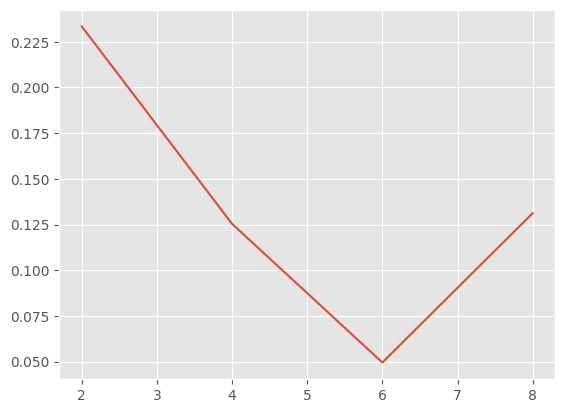

In [46]:
plt.plot(*zip(*count_silhouette))

* No Clear Elbow:
If the inertia plot doesn't show a clear elbow and the inertia decreases smoothly without a significant break point, it might be challenging to determine the optimal k based solely on this method.  
  
* Slight Elbow:
If there's a slight elbow, it suggests that adding more clusters beyond that point provides diminishing returns in terms of explaining the variance in the data.  
  
* Sharp Elbow:
If there's a sharp elbow, it indicates a more pronounced point where the addition of clusters is less beneficial. This is often considered a good candidate for the optimal number of clusters.  

  However, it's important to note that the elbow method has limitations, and the choice of k may not always be entirely clear-cut. It's often used as a heuristic rather than a strict rule. Other factors, such as domain knowledge, the context of the problem, and the specific characteristics of the data, should also be considered.

## Model Output
Now that we've decided on k=4 clusters, let's assign the cluster labels back to the original data, and make it interpretable!

In [47]:
km = KMeans(n_clusters=4)
%time km.fit(df2_sample_dummies_concat_cities2_train)
clusters4 = km.labels_.tolist()
silhouette_k4 = silhouette_score(df2_sample_dummies_concat_cities2_train[0:50000], clusters[0:50000])

CPU times: total: 250 ms
Wall time: 378 ms


In [48]:
df2_sample_dummies_concat_cities2_train.loc[:, "cluster_number"] = clusters4

In [49]:
df2_sample_dummies_concat_cities2_train.head()

group_id_6388  group_id_6510  group_id_8458  group_id_8940  \
166536           False          False          False          False   
387221           False          False          False          False   
1350022          False          False          False          False   
370689           False          False          False          False   
1502500          False          False          False          False   

         group_id_12542  group_id_12907  group_id_14573  group_id_15324  \
166536            False           False           False           False   
387221            False           False           False           False   
1350022           False           False           False           False   
370689            False           False           False           False   
1502500           False           False           False           False   

         group_id_17921  group_id_18843  ...  group_id_26305466  \
166536            False           False  ...              False   
387221            False           False  ...              False   
1350022           False           False  ...              False   
370689            False           False  ...              False   
1502500           False           False  ...              False   

         group_id_26315598  group_id_26330590  group_id_26355546  \
166536               False              False              False   
387221               False              False              False   
1350022              False              False              False   
370689               False              False              False   
1502500              False              False              False   

         cities__Chicago  cities__New York  cities__San Francisco  \
166536             False              True                  False   
387221             False             False                   True   
1350022            False              True                  False   
370689             False              True                  False   
1502500             True             False                  False   

         cities__South San Francisco  cities__West New York  cluster_number  
166536                         False                  False               3  
387221                         False                  False               2  
1350022                        False                  False               3  
370689                         False                  False               3  
1502500                        False                  False               0  

[5 rows x 2771 columns]

In [50]:
df2_sample_dummies_concat_cities2_train["cluster_number"].value_counts()

cluster_number
3    2856
2    1322
0     814
1       8
Name: count, dtype: int64

## Tadah! We have a merged dataframe of members, clustered by their city and groups they're interested in, merged on what the group categories are (from the original groups df) and we can now export this and explore!

In [51]:
df2_sample.head()

member_id                                                bio  \
166536     3543698  stephen orban, R&D web shared services, Bloomb...   
387221     7325430                                          not_found   
1350022   29261262                                          not_found   
370689     7059477                                          not_found   
1502500   40755762  I'm Tara, SAHM to Jackson (Feb '11) and Aidan ...   

                  city country        hometown               joined    lat  \
166536        New York      us       not_found  2012-02-09 22:16:04  40.74   
387221   San Francisco      us     los angeles  2008-06-19 19:32:41  37.78   
1350022       New York      us       not_found  2017-04-14 01:53:34  40.76   
370689        New York      us       not_found  2015-11-23 14:50:33  40.73   
1502500        Chicago      us  Brownstown, MI  2014-10-04 12:08:50  41.92   

                                           link     lon      member_name  \
166536    http://www.meetup.com/members/3543698  -74.00    Stephen Orban   
387221    http://www.meetup.com/members/7325430 -122.42          heather   
1350022  http://www.meetup.com/members/29261262  -73.99     Polina Hanin   
370689    http://www.meetup.com/members/7059477  -74.01  Allison Milgrom   
1502500  http://www.meetup.com/members/40755762  -87.65       Tara Steel   

        state member_status              visited  group_id  
166536     NY        active  2014-04-12 19:40:56   2829432  
387221     CA        active  2008-06-19 19:32:41    328570  
1350022    NY        active  2017-04-14 01:53:34    446699  
370689     NY        active  2015-11-23 14:50:33  19072555  
1502500    IL        active  2015-03-16 20:32:01   1775358

In [52]:
df2_sample.loc[:, "clusters_number"] = clusters4

In [53]:
df2_sample.to_csv('members_cluster_group.csv')

In [54]:
!cp members_cluster_group.csv "gdrive/My Drive/Work/UBB 2023/02_Cursuri/Session #5/data/"

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [55]:
df2_sample.head()

member_id                                                bio  \
166536     3543698  stephen orban, R&D web shared services, Bloomb...   
387221     7325430                                          not_found   
1350022   29261262                                          not_found   
370689     7059477                                          not_found   
1502500   40755762  I'm Tara, SAHM to Jackson (Feb '11) and Aidan ...   

                  city country        hometown               joined    lat  \
166536        New York      us       not_found  2012-02-09 22:16:04  40.74   
387221   San Francisco      us     los angeles  2008-06-19 19:32:41  37.78   
1350022       New York      us       not_found  2017-04-14 01:53:34  40.76   
370689        New York      us       not_found  2015-11-23 14:50:33  40.73   
1502500        Chicago      us  Brownstown, MI  2014-10-04 12:08:50  41.92   

                                           link     lon      member_name  \
166536    http://www.meetup.com/members/3543698  -74.00    Stephen Orban   
387221    http://www.meetup.com/members/7325430 -122.42          heather   
1350022  http://www.meetup.com/members/29261262  -73.99     Polina Hanin   
370689    http://www.meetup.com/members/7059477  -74.01  Allison Milgrom   
1502500  http://www.meetup.com/members/40755762  -87.65       Tara Steel   

        state member_status              visited  group_id  clusters_number  
166536     NY        active  2014-04-12 19:40:56   2829432                3  
387221     CA        active  2008-06-19 19:32:41    328570                2  
1350022    NY        active  2017-04-14 01:53:34    446699                3  
370689     NY        active  2015-11-23 14:50:33  19072555                3  
1502500    IL        active  2015-03-16 20:32:01   1775358                0

In [56]:
df2_sample['city'].nunique()

5

In [57]:
df2_sample['group_id'].nunique()

2765